In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as web
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Download training and testing data
data= yf.download('AAPL', start="2020-01-01", end="2024-01-01")




[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.isnull().sum()/len(data)

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

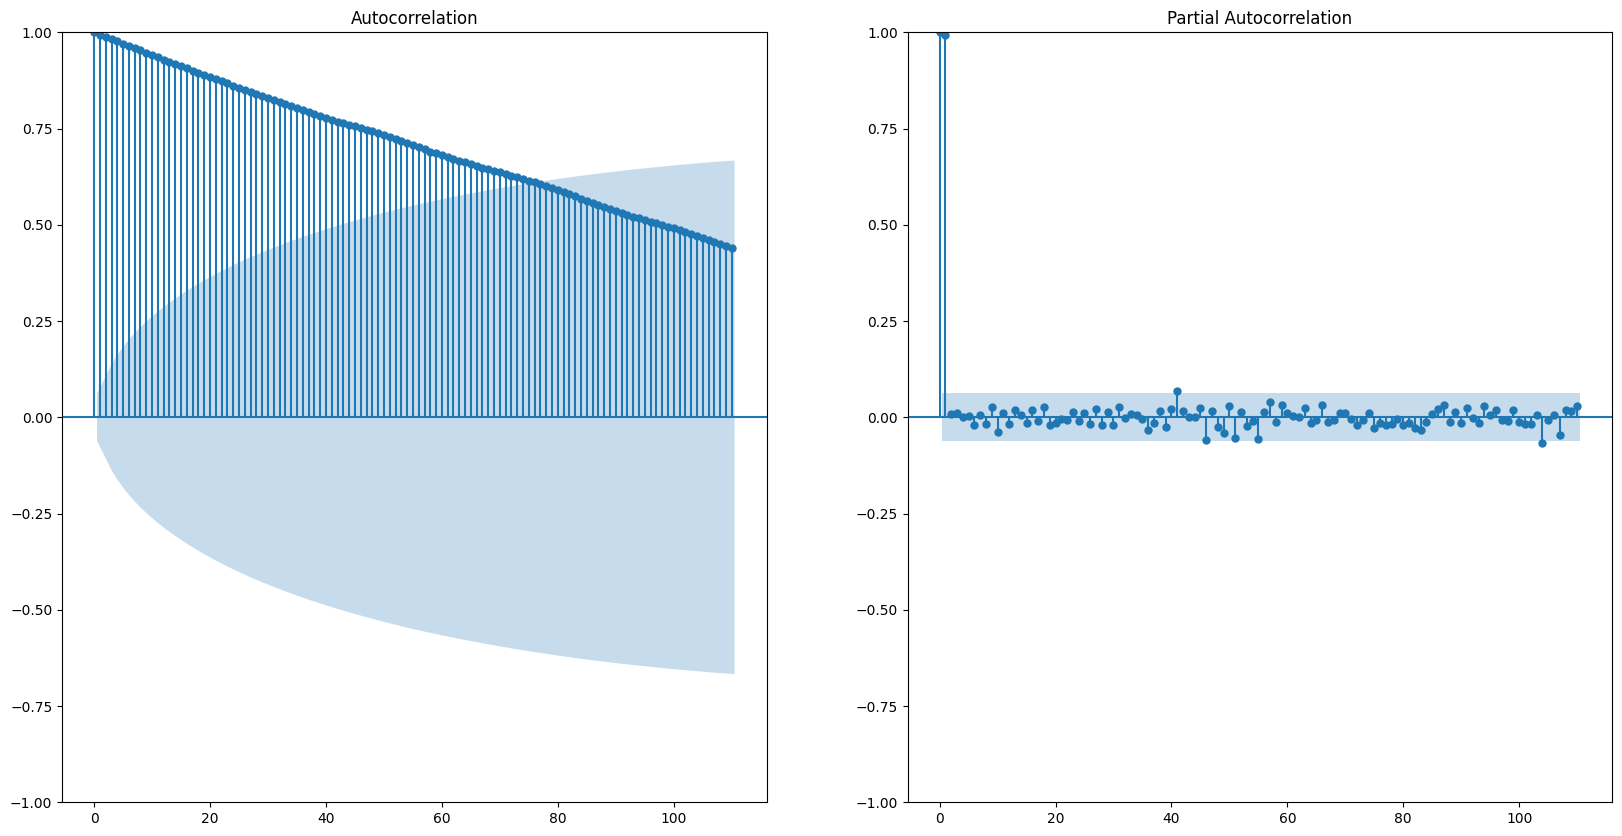

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF to help determine ARIMA parameters
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plot_acf(data['Adj Close'].dropna(), lags = 110 ,ax=ax[0])
plot_pacf(data['Adj Close'].dropna(), lags = 110,ax=ax[1])
plt.show()


In [ ]:
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(data['Adj Close'])


ADF Statistic: -1.511951
p-value: 0.527591
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
# Differencing if non-stationary
if data['Adj Close'][1] > 0.05:  # Using a common significance level of 5%
    data['Differenced'] = data['Adj Close'].diff().dropna()
    check_stationarity(data['Differenced'])
else:
    data['Differenced'] = data['Adj Close']

ADF Statistic: -32.990259
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Differenced
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800,-0.710289
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,0.576500
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,-0.342987
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750229,132079200,1.167580
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-1.078598
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.549301
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.099854


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

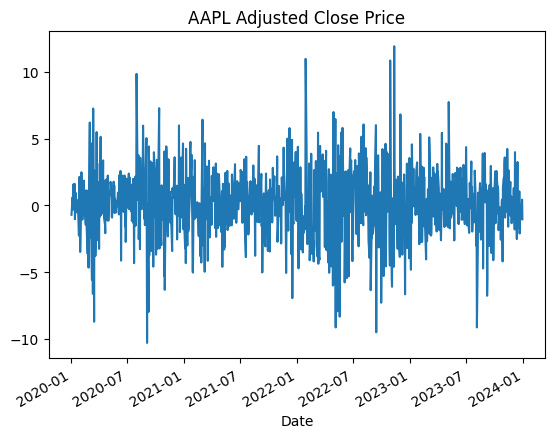

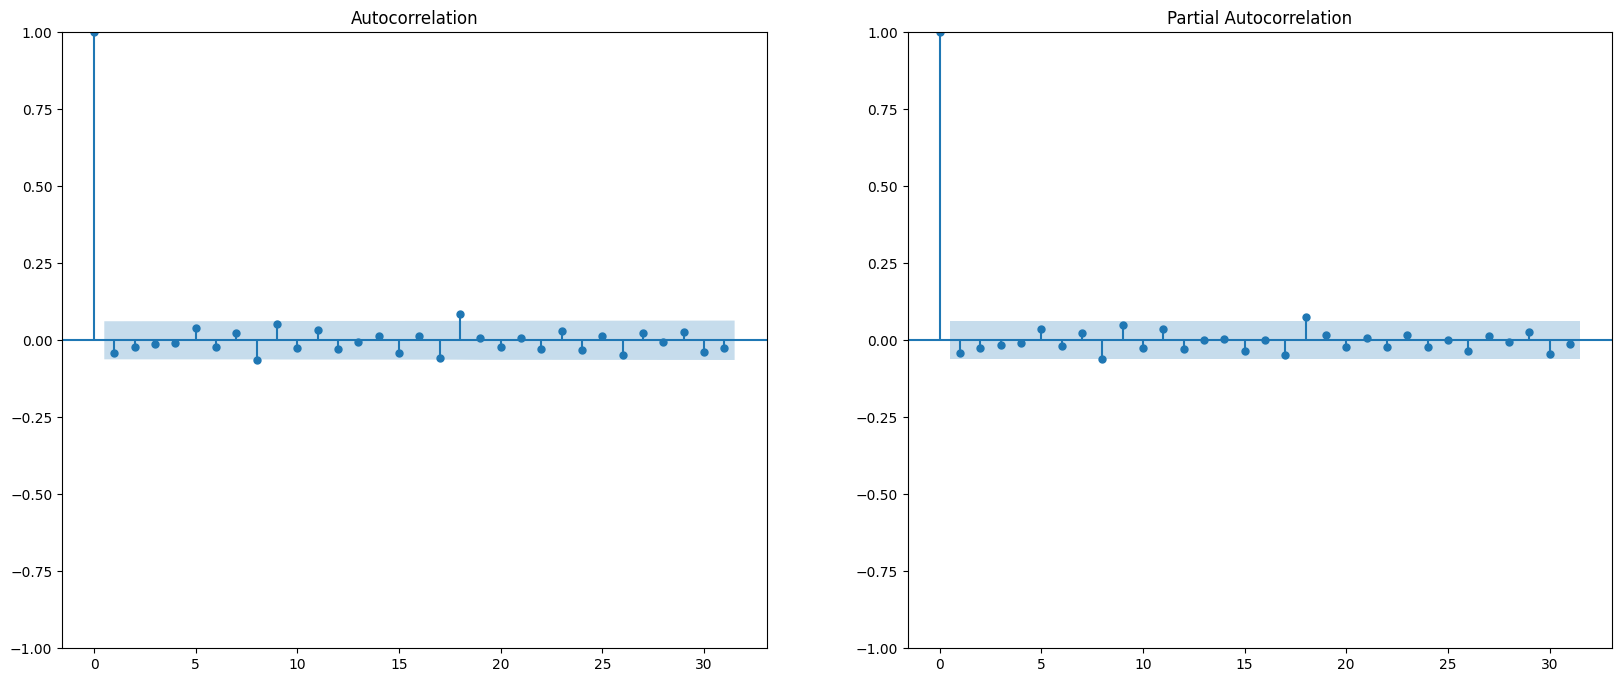

In [ ]:
# Ensure your DataFrame is indexed by date for time series analysis
data['Differenced'].plot(title='AAPL Adjusted Close Price')
plt.show()


# Plot ACF and PACF to help determine ARIMA parameters
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
plot_acf(data['Differenced'].dropna(), ax=ax[0])
plot_pacf(data['Differenced'].dropna(), ax=ax[1])
plt.show()


In [ ]:
data.dropna(inplace = True)

<Figure size 640x480 with 0 Axes>

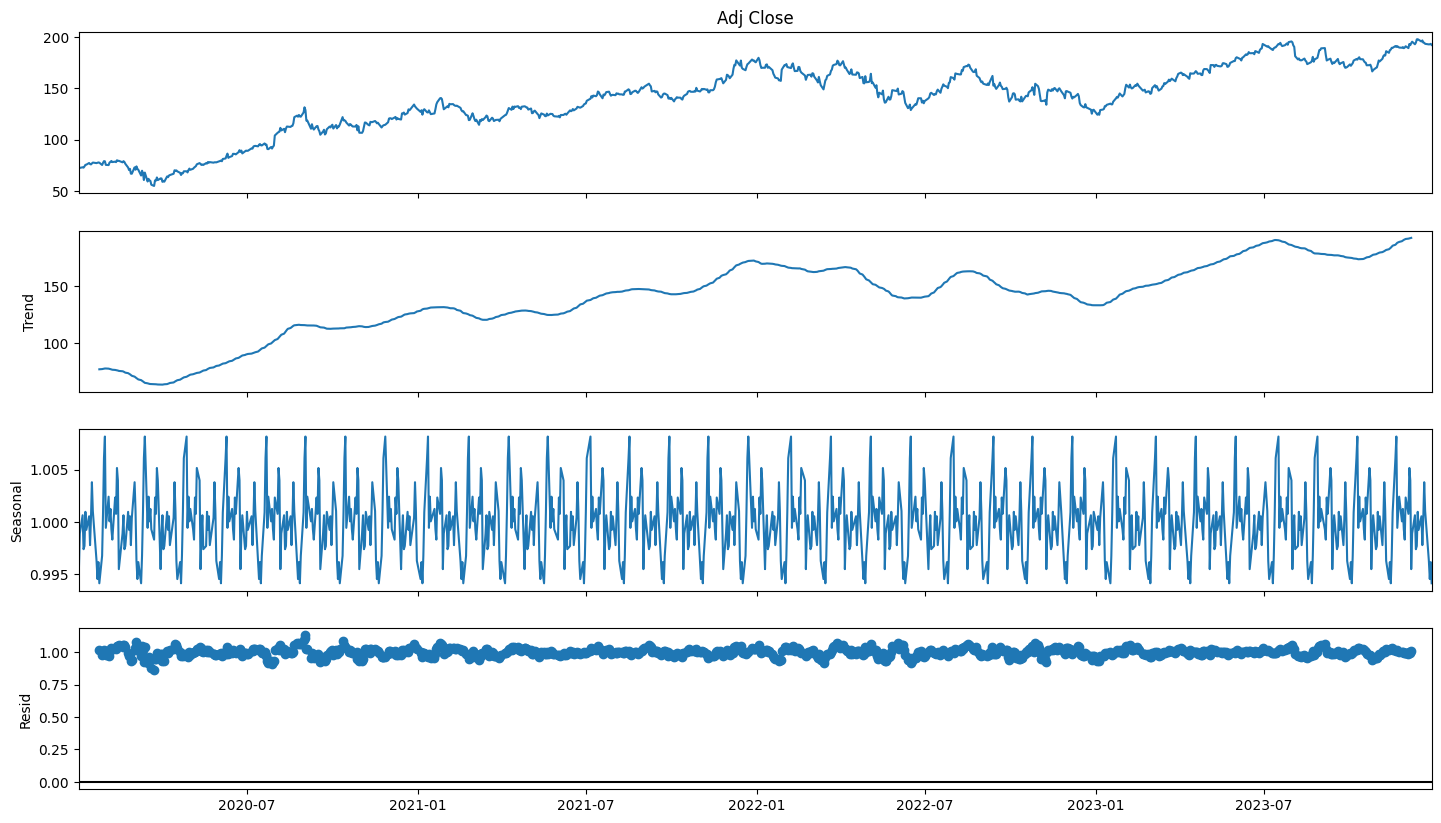

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data['Adj Close'],model= 'multiplicative', period=30)
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(16,9)

## Check different ARIMA

In [ ]:
split_point = int(len(data) * 0.8)
training_set, test_set = data[:split_point], data[split_point:]


In [ ]:
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA

# Assume p, d, and q have been chosen based on diagnostic checks such as ACF and PACF plots
model = ARIMA(training_set['Differenced'], order=(2,1,0))


# Fit the ARIMA model
model_fit = model.fit()


# Print out the summary of the model's performance
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  804
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2078.804
Date:                Sun, 14 Apr 2024   AIC                           4163.609
Time:                        02:59:03   BIC                           4177.674
Sample:                             0   HQIC                          4169.011
                                - 804                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6917      0.029    -23.580      0.000      -0.749      -0.634
ar.L2         -0.3404      0.028    -12.200      0.000      -0.395      -0.286
sigma2        10.2365      0.396     25.857      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
len(test_set)

202

## Making Prediction

In [ ]:
# Predict on the test set
predictions = model_fit.predict(start=len(training_set), end=len(training_set) + len(test_set) - 1, typ='levels')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_set['Differenced'], predictions))
print(f'Test RMSE: {rmse}')


Test RMSE: 2.110606872349828


## Model Evaluation

In [ ]:
import statsmodels.api as sm
# Define the ARIMA model; here we use p=1, d=1, q=1
model = sm.tsa.arima.ARIMA(data['Differenced'], order=(2,1,2))

# Fit the ARIMA model
results = model.fit()

# Print out the summary of the model's performance
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                 1006
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2397.240
Date:                Sun, 14 Apr 2024   AIC                           4804.479
Time:                        03:00:33   BIC                           4829.043
Sample:                             0   HQIC                          4813.813
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9492      0.091    -10.431      0.000      -1.128      -0.771
ar.L2         -0.0635      0.027     -2.314      0.021      -0.117      -0.010
ma.L1         -0.0884      0.553     -0.160      0.8

In [ ]:
# Predict on the test set
predictions = results.predict(start=len(training_set), end=len(training_set) + len(test_set) - 1, typ='levels')

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_set['Differenced'], predictions))
print(f'Test RMSE: {rmse}')

Test RMSE: 2.100607895895666


In [ ]:
import statsmodels.api as sm
# Define the ARIMA model; here we use p=1, d=1, q=1
model = sm.tsa.arima.ARIMA(data['Differenced'], order=(2,1,1))

# Fit the ARIMA model
results2 = model.fit()

# Print out the summary of the model's performance
print(results2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                 1006
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2399.056
Date:                Sun, 14 Apr 2024   AIC                           4806.112
Time:                        03:00:50   BIC                           4825.763
Sample:                             0   HQIC                          4813.579
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0414      0.027     -1.531      0.126      -0.094       0.012
ar.L2         -0.0236      0.028     -0.853      0.394      -0.078       0.031
ma.L1         -1.0000      0.373     -2.680      0.0

In [ ]:
# Predict on the test set
predictions2 = results2.predict(start=len(training_set), end=len(training_set) + len(test_set) - 1, typ='levels')

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_set['Differenced'], predictions2))
print(f'Test RMSE: {rmse}')

Test RMSE: 2.0954789613955294


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2020-01-03 to 2023-12-29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1005 non-null   float64
 1   High         1005 non-null   float64
 2   Low          1005 non-null   float64
 3   Close        1005 non-null   float64
 4   Adj Close    1005 non-null   float64
 5   Volume       1005 non-null   int64  
 6   Differenced  1005 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 62.8 KB


## Prediction

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
num_lags = 5  # Number of lagged features to create
for i in range(1, num_lags + 1):
    data[f'Adj Close Lag {i}'] = data['Adj Close'].shift(i)
    # Include other features if desired, e.g., train_df[f'Volume Lag {i}'] = train_df['Volume'].shift(i)

# Drop the rows with NaN values resulting from the shifting
train_df = train_df.dropna()

# Separate the dataset into features and the target variable
features = train_df.drop(['Close', 'Adj Close'], axis=1)  # 'Close' is dropped because 'Adj Close' is a better representation
target = train_df['Adj Close']

# Split the data into training and testing sets
split_point = int(len(train_df) * 0.8)
X_train, X_test = features[:split_point], features[split_point:]
y_train, y_test = target[:split_point], target[split_point:]

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
predictions = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE: {rmse}')


Test RMSE: 8.670299309624513


In [ ]:
# Feature Engineering: Using only 'Adj Close' for this example
# Scale the data
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Reshape features for LSTM Layer [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Split the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
24/24 [==============================] - 2s 101ms/step - loss: 0.0153
Epoch 2/50
24/24 [==============================] - 3s 121ms/step - loss: 0.0162
Epoch 3/50
24/24 [==============================] - 3s 116ms/step - loss: 0.0152
Epoch 4/50
24/24 [==============================] - 3s 105ms/step - loss: 0.0152
Epoch 5/50
24/24 [==============================] - 2s 78ms/step - loss: 0.0151
Epoch 6/50
24/24 [==============================] - 1s 52ms/step - loss: 0.0152
Epoch 7/50
24/24 [==============================] - 1s 52ms/step - loss: 0.0150
Epoch 8/50
24/24 [==============================] - 1s 56ms/step - loss: 0.0151
Epoch 9/50
24/24 [==============================] - 2s 84ms/step - loss: 0.0152
Epoch 10/50
24/24 [==============================] - 1s 60ms/step - loss: 0.0150
Epoch 11/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0157
Epoch 12/50
24/24 [==============================] - 1s 52ms/step - loss: 0.0152
Epoch 13/50
24/24 [==============

In [ ]:
# Predict
predicted_stock_price = model.predict(X_test)

# Inverse scaling for a better interpretation
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


6/6 [==============================] - 0s 17ms/step


In [ ]:
# Get the actual stock prices for the test set
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f'Test RMSE: {rmse:.2f}')


Test RMSE: 2.13


In [ ]:
# Create a new dataframe with only the 'Close column
data =train_df.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

800

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14516217],
       [0.1564281 ],
       [0.14915534],
       [0.14687826],
       [0.15350539],
       [0.15943583],
       [0.15576531],
       [0.15768558],
       [0.16028542],
       [0.15872203],
       [0.14281703],
       [0.15766847],
       [0.16896846],
       [0.16816992],
       [0.14376879],
       [0.14232435],
       [0.15963969],
       [0.16405768],
       [0.17044679],
       [0.16293532],
       [0.1655244 ],
       [0.16221987],
       [0.17514795],
       [0.17117914],
       [0.17131536],
       [0.16118107],
       [0.16905011],
       [0.16339516],
       [0.15104656],
       [0.12571872],
       [0.10851557],
       [0.11629977],
       [0.0837159 ],
       [0.08344339],
       [0.12679184],
       [0.11062776],
       [0.1334857 ],
       [0.11675961],
       [0.11013386],
       [0.07119691],
       [0.10384868],
       [0.08696926],
       [0.04064011],
       [0.09129548],
       [0.03038641],
       [0.04852626],
       [0.037983  ],
       [0.034

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14516217, 0.1564281 , 0.14915534, 0.14687826, 0.15350539,
       0.15943583, 0.15576531, 0.15768558, 0.16028542, 0.15872203,
       0.14281703, 0.15766847, 0.16896846, 0.16816992, 0.14376879,
       0.14232435, 0.15963969, 0.16405768, 0.17044679, 0.16293532,
       0.1655244 , 0.16221987, 0.17514795, 0.17117914, 0.17131536,
       0.16118107, 0.16905011, 0.16339516, 0.15104656, 0.12571872,
       0.10851557, 0.11629977, 0.0837159 , 0.08344339, 0.12679184,
       0.11062776, 0.1334857 , 0.11675961, 0.11013386, 0.07119691,
       0.10384868, 0.08696926, 0.04064011, 0.09129548, 0.03038641,
       0.04852626, 0.037983  , 0.03476382, 0.0082949 , 0.        ,
       0.03834067, 0.03602425, 0.05803057, 0.03980555, 0.05184766,
       0.05096198, 0.02817216, 0.03501933, 0.02902378, 0.0648947 ])]
[0.05971678181645068]

[array([0.14516217, 0.1564281 , 0.14915534, 0.14687826, 0.15350539,
       0.15943583, 0.15576531, 0.15768558, 0.16028542, 0.15872203,
       0.14281703, 0.15766847, 0.16

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

740/740 [==============================] - 45s 56ms/step - loss: 0.0035


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7/7 [==============================] - 1s 34ms/step


3.90549556011878